In [276]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from keras.utils import to_categorical
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
seg_data = pd.read_csv('segmentationdata.csv')
seg_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


**Exploratory Data Analysis**

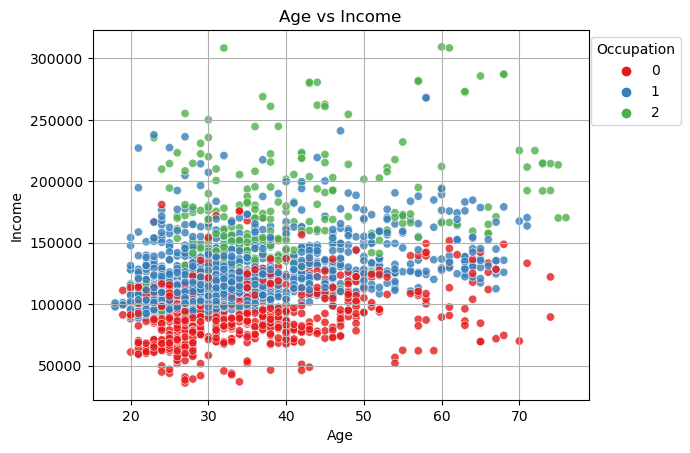

In [3]:
sb.scatterplot(data = seg_data, x = 'Age', y ='Income', hue = 'Occupation', palette = 'Set1', alpha = 0.8)
plt.legend(title = 'Occupation', loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.title('Age vs Income')
plt.grid()
plt.show()

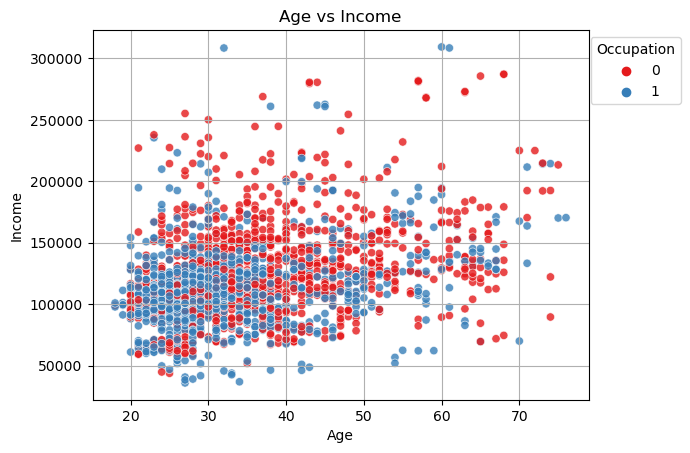

In [4]:
sb.scatterplot(data = seg_data, x = 'Age', y ='Income', hue = 'Sex', palette = 'Set1', alpha = 0.8)
plt.legend(title = 'Occupation', loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.title('Age vs Income')
plt.grid()
plt.show()

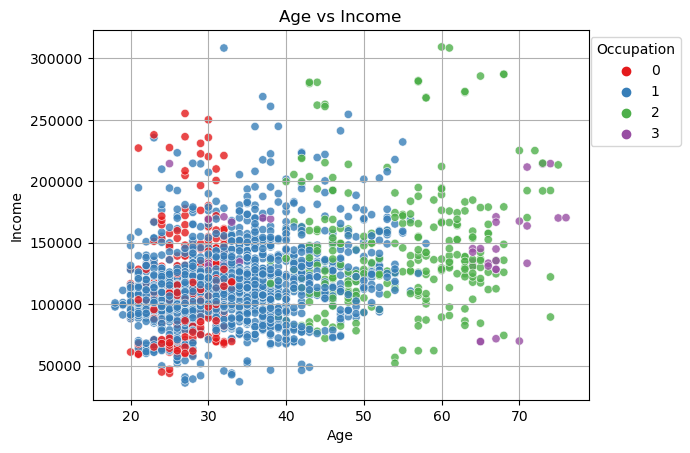

In [5]:
sb.scatterplot(data = seg_data, x = 'Age', y ='Income', hue = 'Education', palette = 'Set1', alpha = 0.8)
plt.legend(title = 'Occupation', loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.title('Age vs Income')
plt.grid()
plt.show()

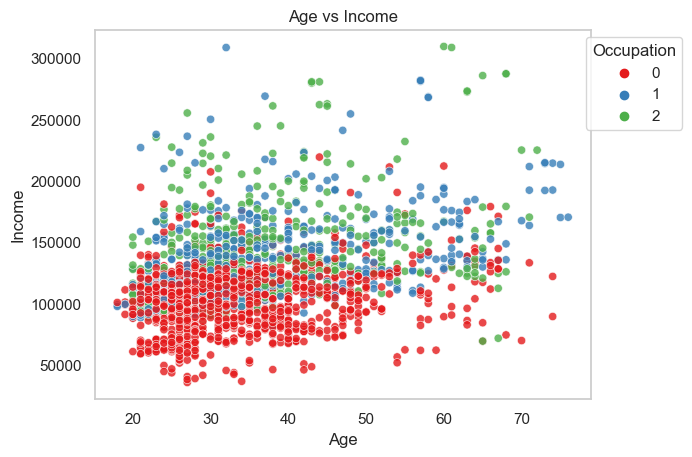

In [70]:
sb.scatterplot(data = seg_data, x = 'Age', y ='Income', hue = 'Settlement size', palette = 'Set1', alpha = 0.8)
plt.legend(title = 'Occupation', loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.title('Age vs Income')
plt.grid()
plt.show()

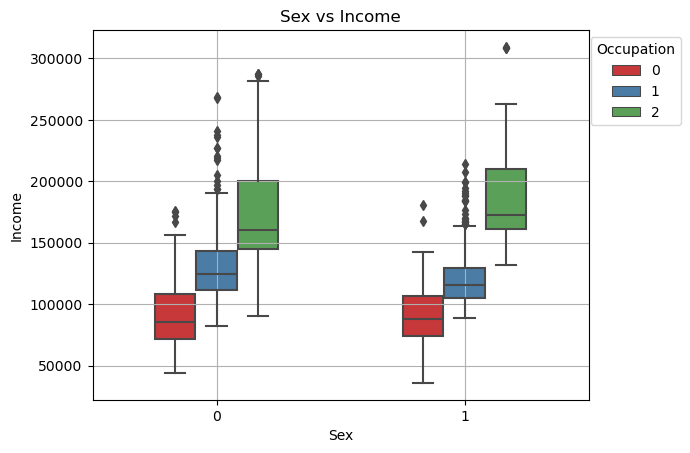

In [7]:
sb.boxplot(data=seg_data, x='Sex', y='Income', hue='Occupation', palette='Set1', saturation=0.7, width=0.5)
plt.legend(title = 'Occupation', loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.title('Sex vs Income')
plt.grid()

C:\Users\MDidish\AppData\Local\Temp\ipykernel_12124\2997396396.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data = seg_data, x = 'Income', palette='Set1', bins = 30, alpha = 1)
C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


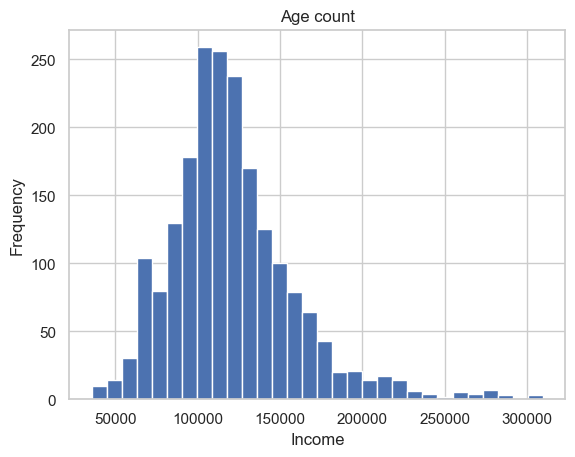

In [71]:
sb.histplot(data = seg_data, x = 'Income', palette='Set1', bins = 30, alpha = 1)
plt.title('Age count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

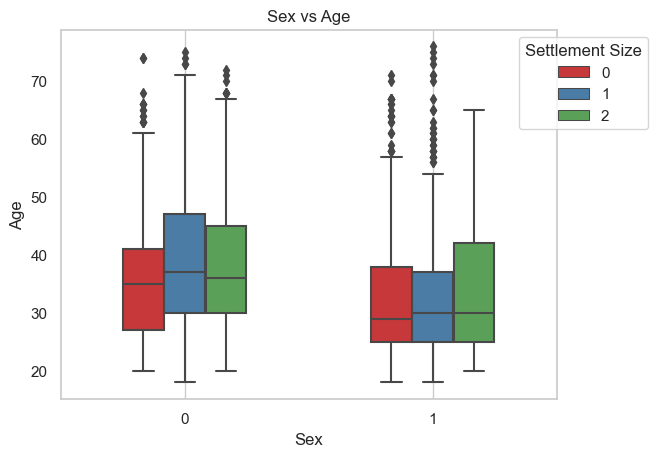

In [72]:
sb.boxplot(data = seg_data, x = 'Sex', y = 'Age', hue ='Settlement size', palette ='Set1', saturation = 0.7, width = 0.5)
plt.legend(title = 'Settlement Size', loc = 'upper right', bbox_to_anchor = (1.2, 1))
plt.title('Sex vs Age')
plt.grid()
plt.show()

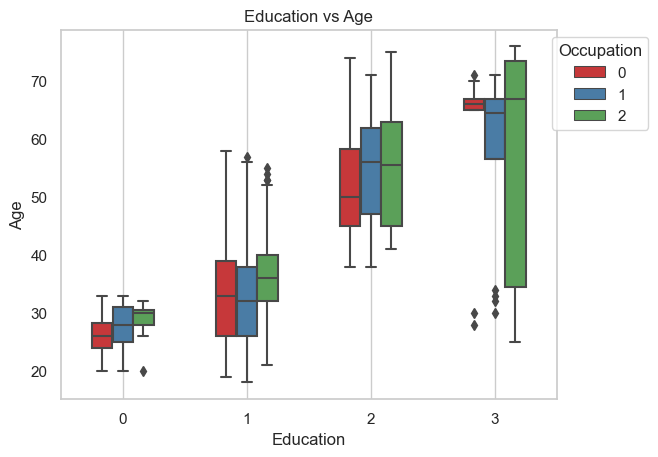

In [73]:
sb.boxplot(data = seg_data, x ='Education', y = 'Age', hue = 'Occupation', palette = 'Set1', saturation = 0.7, width = 0.5)
plt.legend(title = 'Occupation', loc = 'upper right', bbox_to_anchor = (1.2, 1))
plt.title('Education vs Age')
plt.grid()
plt.show()

C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


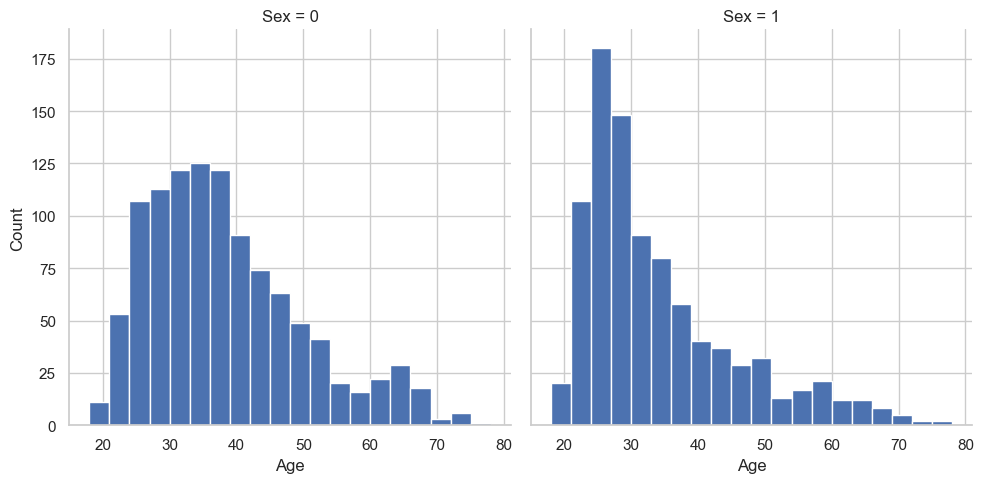

In [11]:
sb.set_theme(style = 'whitegrid')
sb.displot(seg_data, x = 'Age', col = 'Sex' , binwidth = 3, facet_kws = dict(margin_titles = True), alpha = 1)

C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


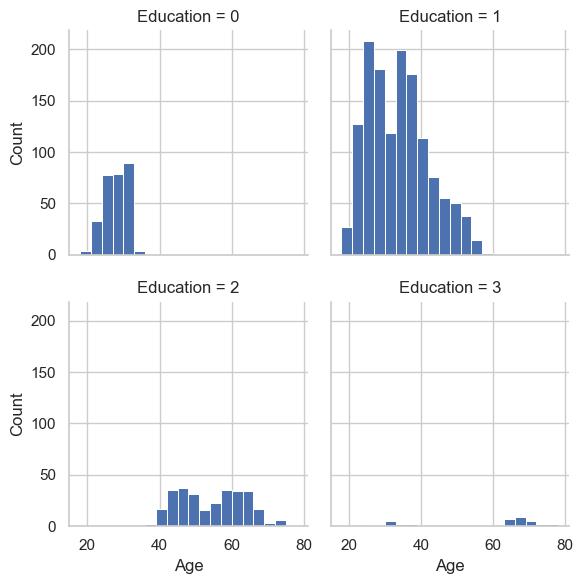

In [12]:
sb.set_theme(style = 'whitegrid')
sb.displot(seg_data, x = 'Age', col = 'Education', col_wrap = 2, binwidth=3, 
           facet_kws=dict(margin_titles=True), alpha = 1, height = 3)

In [13]:
seg_data.Sex.unique()

array([0, 1], dtype=int64)

C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

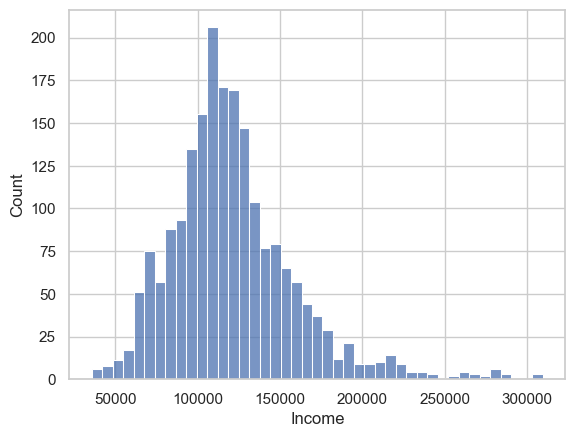

In [14]:
sb.histplot(data = seg_data, x = 'Income')

**Preprocessing data**

A few scaling techniques were tried out, Robust Scaler showed best results.

In [ ]:
seg_data_reduced = seg_data.iloc[:,1:8]
scaler = MinMaxScaler()
seg_data_scaled = scaler.fit_transform(seg_data_reduced)
seg_data_scaled

In [138]:
seg_data = seg_data.iloc[:,1:8]
scaler = StandardScaler()
seg_data_scaled = scaler.fit_transform(seg_data)
seg_data_scaled

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [177]:
seg_data_reduced = seg_data.iloc[:,1:8]
scaler = Normalizer()
seg_data_scaled = scaler.fit_transform(seg_data_reduced)
seg_data_scaled

array([[0.00000000e+00, 5.37418708e-04, 1.60423495e-05, 9.99999855e-01,
        8.02117474e-06, 1.60423495e-05],
       [6.63248718e-06, 1.45914718e-04, 6.63248718e-06, 9.99999989e-01,
        6.63248718e-06, 1.32649744e-05],
       [0.00000000e+00, 5.49265694e-04, 1.12095040e-05, 9.99999849e-01,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.58796273e-04, 0.00000000e+00, 9.99999936e-01,
        0.00000000e+00, 0.00000000e+00],
       [1.02074144e-05, 2.44977945e-04, 1.02074144e-05, 9.99999970e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.65411575e-04, 0.00000000e+00, 9.99999933e-01,
        0.00000000e+00, 0.00000000e+00]])

In [187]:
seg_data_reduced = seg_data.iloc[:,1:8]
scaler = RobustScaler()
seg_data_scaled = scaler.fit_transform(seg_data_reduced)
seg_data_scaled

array([[ 0.        ,  2.26666667,  1.        ,  0.22572942,  0.        ,
         1.        ],
       [ 1.        , -0.73333333,  0.        ,  0.87169937,  0.        ,
         1.        ],
       [ 0.        ,  1.06666667,  0.        , -0.65179787, -1.        ,
        -1.        ],
       ...,
       [ 0.        , -0.13333333, -1.        , -0.72133683, -1.        ,
        -1.        ],
       [ 1.        , -0.6       ,  0.        , -0.43506397, -1.        ,
        -1.        ],
       [ 0.        , -0.53333333, -1.        , -1.1663862 , -1.        ,
        -1.        ]])

**Principle Component Analysis to reduce features**

In [188]:
pca = PCA()
pca_seg_data = pca.fit_transform(seg_data_scaled)
pca_columns = ['PC_' + str(i+1) for i in range((pca_seg_data).shape[1])]
pca_seg_data = pd.DataFrame(data = pca_seg_data, columns = pca_columns)
pca_seg_data

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1.575885,1.460993,-1.523587,0.361322,-0.179181,-0.027828
1,0.865750,-1.232621,0.171094,0.800466,0.577974,0.111295
2,-0.931371,1.114488,-0.601778,-0.576896,0.065714,-0.144863
3,1.277566,0.179061,0.007123,-0.728637,0.304514,-0.005325
4,1.056861,0.598217,-0.446792,-0.626410,0.002695,-0.257180
...,...,...,...,...,...,...
1995,-0.381276,0.966091,-0.151993,-0.838032,0.438299,-0.074426
1996,-0.543459,-0.196934,0.889476,0.091871,-0.246368,-0.040253
1997,-1.531139,-0.271877,-0.360842,-0.835979,0.220016,-0.263702
1998,-1.347493,-0.065892,0.568217,0.266161,0.442676,0.046351


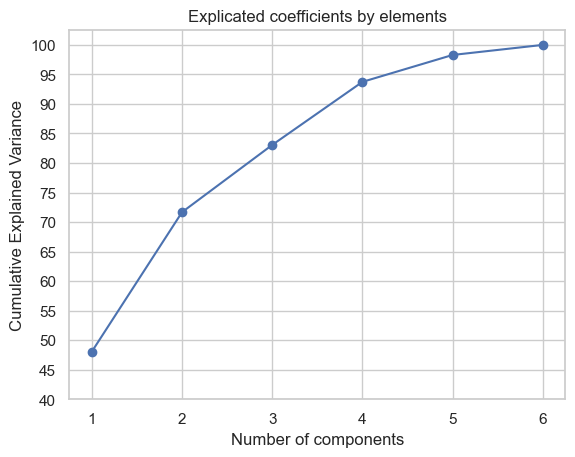

In [189]:
plt.plot(range(1, 7), pca.explained_variance_ratio_.cumsum()*100, marker = 'o')
plt.xticks(range(1, 7))
plt.yticks(range(40, 105, 5))
plt.title('Explicated coefficients by elements')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [190]:
pca.explained_variance_ratio_.cumsum()*100

array([ 48.06388842,  71.67576919,  83.06006769,  93.73918989,
        98.295432  , 100.        ])

In [199]:
pca = PCA(n_components = 3)
pca_seg_data = pca.fit_transform(seg_data_scaled)
pca_columns = ['PC_' + str(i+1) for i in range((pca_seg_data).shape[1])]
pca_seg_data = pd.DataFrame(data = pca_seg_data, columns = pca_columns)
pca_seg_data

,PC_1,PC_2,PC_3
0,1.575885,1.460993,-1.523587
1,0.865750,-1.232621,0.171094
2,-0.931371,1.114488,-0.601778
3,1.277566,0.179061,0.007123
4,1.056861,0.598217,-0.446792
...,...,...,...
1995,-0.381276,0.966091,-0.151993
1996,-0.543459,-0.196934,0.889476
1997,-1.531139,-0.271877,-0.360842
1998,-1.347493,-0.065892,0.568217


In [193]:
pca.explained_variance_ratio_.cumsum()*100

array([48.06388842, 71.67576919, 83.06006769])

**PCA and K-Means Clustering**

In [200]:
wcss = []
for i in range(1, 16):
    kmeans_seg_data = KMeans(n_clusters = i)
    kmeans_seg_data.fit(pca_seg_data)
    wcss.append(kmeans_seg_data.inertia_)

C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

<function matplotlib.pyplot.show(close=None, block=None)>

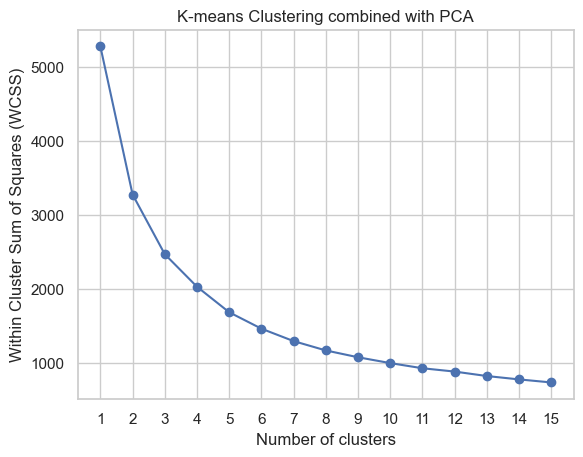

In [201]:
plt.plot(range(1, 16), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('K-means Clustering combined with PCA')
plt.xticks(range(1, 16))
plt.show

In [196]:
kmeans_seg_data = KMeans(n_clusters = 4)
kmeans_seg_data.fit(pca_seg_data)

C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=4)

In [197]:
kmeans_seg_data_pred = kmeans_seg_data.predict(pca_seg_data)
clusters = pd.DataFrame(kmeans_seg_data_pred)
clusters.columns = ['Cluster']
kmeans_pca_seg_data = pd.concat([pca_seg_data, clusters], axis = 1)
kmeans_pca_seg_data

,PC_1,PC_2,PC_3,Cluster
0,1.575885,1.460993,-1.523587,1
1,0.865750,-1.232621,0.171094,0
2,-0.931371,1.114488,-0.601778,1
3,1.277566,0.179061,0.007123,2
4,1.056861,0.598217,-0.446792,1
...,...,...,...,...
1995,-0.381276,0.966091,-0.151993,1
1996,-0.543459,-0.196934,0.889476,3
1997,-1.531139,-0.271877,-0.360842,3
1998,-1.347493,-0.065892,0.568217,3


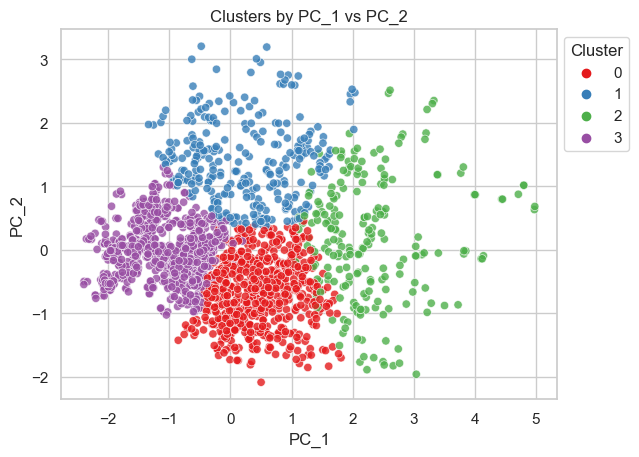

In [208]:
sb.scatterplot(data = kmeans_pca_seg_data, x = 'PC_1', y ='PC_2', hue = 'Cluster', palette = 'Set1', alpha = 0.8)
plt.legend(title = 'Cluster', loc = 'upper right', bbox_to_anchor=(1.16, 1))
plt.title('Clusters by PC_1 vs PC_2')
sb.set_theme(style = 'whitegrid')

**Feedforward Neural Network**

In [261]:
kmeans_pca_seg_data_new = shuffle(kmeans_pca_seg_data)

In [262]:
kmeans_pca_seg_data_new

,PC_1,PC_2,PC_3,Cluster
914,-0.636597,-0.560785,0.135896,3
1302,-0.333827,-0.446328,0.022975,0
1004,0.313047,2.254337,-1.656285,1
1067,1.042815,0.231220,0.058232,0
1771,-1.227561,0.840804,-0.575088,3
...,...,...,...,...
1914,-1.667178,-0.659600,-0.149342,3
562,-0.552502,-0.096210,0.807346,3
43,0.510340,-0.770528,0.786566,0
877,-0.196876,-1.080271,-0.384291,0


C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cluster', ylabel='Count'>

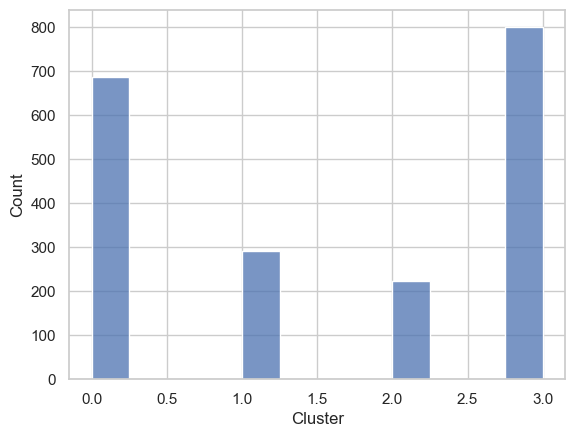

In [264]:
sb.histplot(data = kmeans_pca_seg_data_new, x = 'Cluster')

In [267]:
training_data_x = kmeans_pca_seg_data_new.iloc[0:1600,0:3]
training_data_y = kmeans_pca_seg_data_new.iloc[0:1600,3:4]
testing_data_x = kmeans_pca_seg_data_new.iloc[1600:2000,0:3]
testing_data_y = kmeans_pca_seg_data_new.iloc[1600:2000,3:4]

C:\Users\MDidish\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cluster', ylabel='Count'>

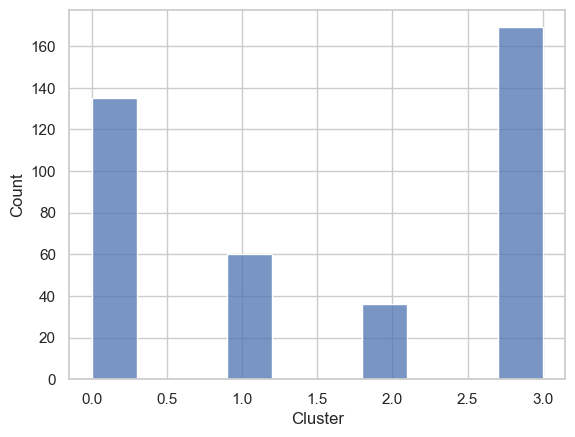

In [268]:
sb.histplot(data = testing_data_y, x = 'Cluster')

In [291]:
FF_neural_network = models.Sequential([
    layers.InputLayer(shape = ([3])),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')    
])
FF_neural_network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,028 (35.27 KB)

 Trainable params: 9,028 (35.27 KB)

 Non-trainable params: 0 (0.00 B)

In [292]:
FF_neural_network.compile(loss = "sparse_categorical_crossentropy", 
                       optimizer = tf.keras.optimizers.Adam(0.001), 
                       metrics = ["accuracy"])

history = FF_neural_network.fit(training_data_x, training_data_y, epochs = 10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.7070 - loss: 1.0732
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.9239 - loss: 0.3337
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9406 - loss: 0.1947
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9507 - loss: 0.1447
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9672 - loss: 0.1106
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9775 - loss: 0.0980
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9738 - loss: 0.0907
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9823 - loss: 0.0758
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9843 - loss: 0.0704
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9893 - loss: 0.0607


In [293]:
FF_neural_network.evaluate(testing_data_x, testing_data_y)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9922 - loss: 0.0469  


[0.045043859630823135, 0.9900000095367432]

In [294]:
predictions = FF_neural_network.predict(testing_data_x)
pred_classes = [np.argmax(element) for element in predictions]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [295]:
confusion_matrix(testing_data_y, pred_classes, labels = [0,1,2,3])

array([[135,   0,   0,   0],
       [  1,  58,   1,   0],
       [  1,   0,  35,   0],
       [  0,   1,   0, 168]], dtype=int64)

In [296]:
print("Classification Report: \n", classification_report(testing_data_y, pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       135
           1       0.98      0.97      0.97        60
           2       0.97      0.97      0.97        36
           3       1.00      0.99      1.00       169

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



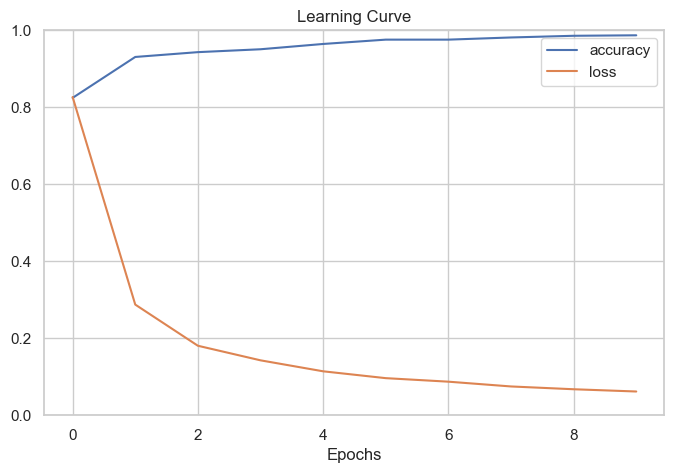

In [311]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()